# BUILDING A MACHINE LEARNING MODEL OF THE DISNEYLAND TOUR'S 
# REVIEWS

## importing necessary libraries

In [1]:
# importing the necessary libraries
from sklearn.metrics import f1_score,accuracy_score,classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## reading the csv file

In [2]:
# reading the file...
file = pd.read_csv('DisneylandReviews.csv')
files = file.copy()
file.head()

,Review_ID,Rating,Year_Month,Reviewer_Location,Review_Text,Branch
0,670772142,4,2019-4,Australia,If you've ever been to Disneyland anywhere you...,Disneyland_HongKong
1,670682799,4,2019-5,Philippines,Its been a while since d last time we visit HK...,Disneyland_HongKong
2,670623270,4,2019-4,United Arab Emirates,Thanks God it wasn t too hot or too humid wh...,Disneyland_HongKong
3,670607911,4,2019-4,Australia,HK Disneyland is a great compact park. Unfortu...,Disneyland_HongKong
4,670607296,4,2019-4,United Kingdom,"the location is not in the city, took around 1...",Disneyland_HongKong


In [3]:
# for this particular model we need only the reviews and the ratings and so we will reduce our file to just the two
file = file[['Review_Text','Rating']]
file.head()

,Review_Text,Rating
0,If you've ever been to Disneyland anywhere you...,4
1,Its been a while since d last time we visit HK...,4
2,Thanks God it wasn t too hot or too humid wh...,4
3,HK Disneyland is a great compact park. Unfortu...,4
4,"the location is not in the city, took around 1...",4


In [4]:
# now we need to create a sentiment class from our rating to keep our file clean...
# to do that lets change our file into a JSONlike file by putting it in a list of dictionary..
#lets make use of a for-loop

# lets change the individual columns into a list
Ratings = list(file['Rating'])
Reviews = list(file['Review_Text'])
new_file = []
for ratings,reviews in zip(Ratings,Reviews):
    List = {'Reviews':reviews,'Rating':ratings}
    new_file.append(List)
    
new_file[:2]

[{'Reviews': "If you've ever been to Disneyland anywhere you'll find Disneyland Hong Kong very similar in the layout when you walk into main street! It has a very familiar feel. One of the rides  its a Small World  is absolutely fabulous and worth doing. The day we visited was fairly hot and relatively busy but the queues moved fairly well. ",
  'Rating': 4},
 {'Reviews': "Its been a while since d last time we visit HK Disneyland .. Yet, this time we only stay in Tomorrowland .. AKA Marvel land!Now they have Iron Man Experience n d Newly open Ant Man n d Wasp!!Ironman .. Great feature n so Exciting, especially d whole scenery of HK (HK central area to Kowloon)!Antman .. Changed by previous Buzz lightyear! More or less d same, but I'm expecting to have something most!!However, my boys like it!!Space Mountain .. Turns into Star Wars!! This 1 is Great!!!For cast members (staffs) .. Felt bit MINUS point from before!!! Just dun feel like its a Disney brand!! Seems more local like Ocean Park

In [5]:
# now lets create the class ...


class SENTIMENT:
    POSITIVE = 'POSITIVE'
    NEGATIVE = 'NEGATIVE'
    #positive sentiments = ratings 1 and 2
    #negative sentiments = ratings > 2
    
#    
class Review:
    def __init__(self,Reviews,Rating):
        self.Reviews = Reviews
        self.Rating = Rating
        self.Sentiment = self.get_sentiment()
        
    def get_sentiment(self):
        if (self.Rating == 1 or self.Rating == 2):
            return SENTIMENT.NEGATIVE
        else:
            return SENTIMENT.POSITIVE   
        
class ReviewContainer:
    def __init__(self,reviews):
        self.reviews = reviews
        
    def get_reviews(self):
        return [x.Reviews for x in self.reviews]
    def get_sentiment(self):
        return [x.Sentiment for x in self.reviews]
    
# this method evenly distributes between the positive and negative reviews    
    def EvenlyDistribute(self):
        positive = list(filter(lambda x:x.Sentiment==SENTIMENT.POSITIVE,self.reviews))
        negative = list(filter(lambda x:x.Sentiment==SENTIMENT.NEGATIVE,self.reviews))
        positive_shrunked = positive[:len(negative)]
        self.reviews = negative + positive_shrunked      

In [6]:
Disney_file = []
for lists in new_file:
    new_file_list = Review(lists['Reviews'],lists['Rating'])
    Disney_file.append(new_file_list)
Disney_file[0].Reviews

"If you've ever been to Disneyland anywhere you'll find Disneyland Hong Kong very similar in the layout when you walk into main street! It has a very familiar feel. One of the rides  its a Small World  is absolutely fabulous and worth doing. The day we visited was fairly hot and relatively busy but the queues moved fairly well. "

In [7]:
# lets build or model
# lets split our Disney_file

train,test = train_test_split(Disney_file,test_size=0.3,random_state=21)
# lets split both our train and test into xs and ys
# lets make use of our class
train_cont = ReviewContainer(train)
test_cont = ReviewContainer(test)

train_cont.EvenlyDistribute()
test_cont.EvenlyDistribute()

x_train = train_cont.get_reviews()
y_train = train_cont.get_sentiment()

x_test = test_cont.get_reviews()
y_test = test_cont.get_sentiment()

In [8]:
# now lets break our datasets' reviews using the count_vectorizer
# basically what count_vectorizer does in break each words down and changes them into a machine readable text
# this little process is what is called BagOfWords

count_Vec = CountVectorizer()
x_train_vect = count_Vec.fit_transform(x_train)
x_test_vect = count_Vec.transform(x_test)

In [9]:
# using DecisionTree classifier
clf_dt = DecisionTreeClassifier()
clf_dt.fit(x_train_vect,y_train)
clf_dt.predict(x_test_vect)
print('\nDECISION TREE CLASSIFICATION\n\n')
print('accuracy score:\n',accuracy_score(y_test,clf_dt.predict(x_test_vect)))
print('classification reports:\n',classification_report(y_test,clf_dt.predict(x_test_vect)))


DECISION TREE CLASSIFICATION


accuracy score:
 0.6931124673060157
classification reports:
               precision    recall  f1-score   support

    NEGATIVE       0.70      0.69      0.69      1147
    POSITIVE       0.69      0.70      0.70      1147

    accuracy                           0.69      2294
   macro avg       0.69      0.69      0.69      2294
weighted avg       0.69      0.69      0.69      2294



In [10]:
svc_classifier = SVC()
svc_classifier.fit(x_train_vect,y_train)
svc_classifier.predict(x_test_vect)
print('\nSVC\n\n')
print('accuracy score:\n',accuracy_score(y_test,svc_classifier.predict(x_test_vect)))
print('classification reports:\n',classification_report(y_test,svc_classifier.predict(x_test_vect)))


SVC


accuracy score:
 0.8365300784655624
classification reports:
               precision    recall  f1-score   support

    NEGATIVE       0.84      0.83      0.83      1147
    POSITIVE       0.83      0.85      0.84      1147

    accuracy                           0.84      2294
   macro avg       0.84      0.84      0.84      2294
weighted avg       0.84      0.84      0.84      2294



In [11]:
# lets check our f1_score
from sklearn.metrics import f1_score
print(f1_score(y_test,clf_dt.predict(x_test_vect),average=None,labels=(SENTIMENT.POSITIVE,SENTIMENT.NEGATIVE)))
print('\n')
print(f1_score(y_test,svc_classifier.predict(x_test_vect),average=None,labels=(SENTIMENT.POSITIVE,SENTIMENT.NEGATIVE)))

[0.69550173 0.69068541]


[0.83815278 0.8348745 ]


In [12]:
# saving our decision tree model using pickle

import pickle

with open('disney.pkl','wb') as myfile:
    pickle.dump(clf_dt,myfile)

with open('disney.pkl','rb') as myfile:
    model = pickle.load(myfile)

In [13]:
# saving our support vector machine model using pickle

import pickle

with open('disney_svc.pkl','wb') as myfile:
    pickle.dump(svc_classifier,myfile)

with open('disney_svc.pkl','rb') as myfile:
    model_svc = pickle.load(myfile)

In [14]:
testing = ['the tour is a nice one .. i really enjoyed it.','the tour is a bad one, no improvement at all.']
s = count_Vec.transform(testing)
model.predict(s)

array(['POSITIVE', 'NEGATIVE'], dtype='<U8')

In [15]:
testing = ['the tour is a bad one .. I really did not enjoy it.','the tour is a bad one, no improvement at all.']
s = count_Vec.transform(testing)
model_svc.predict(s)

array(['POSITIVE', 'POSITIVE'], dtype='<U8')

## Visualization

## Now lets plot a graph using matplotlib

In [16]:
# Lets plot the graph showing the Disneyland Branch with the highest number of Positive reviews

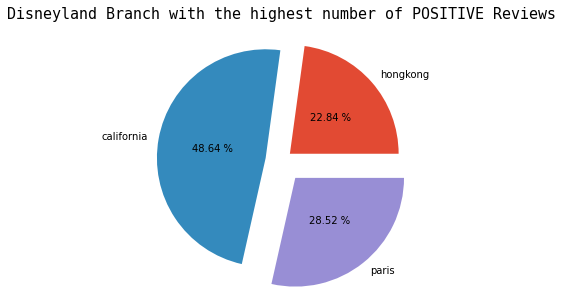

In [17]:
files
hongkong = files.loc[files['Branch']=='Disneyland_HongKong']
hongkong = hongkong.loc[hongkong.Rating>=4]['Rating'].count()
california = files.loc[files['Branch']=='Disneyland_California']
california = california.loc[california.Rating>=4]['Rating'].count()
paris = files.loc[files['Branch']=='Disneyland_Paris']
paris = paris.loc[paris.Rating>=4]['Rating'].count()
plt.style.use('ggplot')
plt.figure(figsize=(15,5))
label = ['hongkong','california','paris']
plt.pie([hongkong,california,paris],
        autopct='%.2f %%',
        labels=label,explode=[.1,.15,.2],
        pctdistance=.5)
plt.title('Disneyland Branch with the highest number of POSITIVE Reviews',fontdict={'fontname':'monospace','fontsize':15})
plt.show()